In [20]:
#used libraries
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA .csv")

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-26,13.455333,13.908000,13.403333,13.770000,13.770000,48517500
1,2015-01-27,13.628000,13.868667,13.553333,13.732000,13.732000,41715000
2,2015-01-28,13.740667,13.758000,13.228000,13.291333,13.291333,47244000
3,2015-01-29,13.404667,13.732000,13.100000,13.680000,13.680000,53221500
4,2015-01-30,13.597333,13.831333,13.533333,13.573333,13.573333,45105000


In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1990,2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600
1991,2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300
1992,2022-12-21,139.339996,141.259995,135.889999,137.570007,137.570007,145417400
1993,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
1994,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700


In [21]:
training_set = df.iloc[:1200, 1:2].values
test_set = df.iloc[1200:, 1:2].values

In [22]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 1200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(855, 60, 1)

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 14s 127ms/step - loss: 0.0013
Epoch 2/100
36/36 [==============================] - 5s 129ms/step - loss: 3.7172e-04
Epoch 3/100
36/36 [==============================] - 9s 258ms/step - loss: 3.0296e-04
Epoch 4/100
36/36 [==============================] - 7s 202ms/step - loss: 2.9283e-04
Epoch 5/100
36/36 [==============================] - 6s 149ms/step - loss: 2.6344e-04
Epoch 6/100
36/36 [==============================] - 5s 128ms/step - loss: 2.6061e-04
Epoch 7/100
36/36 [==============================] - 7s 199ms/step - loss: 2.4360e-04
Epoch 8/100
36/36 [==============================] - 5s 129ms/step - loss: 2.2907e-04
Epoch 9/100
36/36 [==============================] - 7s 182ms/step - loss: 2.2878e-04
Epoch 10/100
36/36 [==============================] - 5s 128ms/step - loss: 2.2520e-04
Epoch 11/100
36/36 [==============================] - 5s 149ms/step - loss: 2.0870e-04
Epoch 12/100
36/36 [==============================] - 5

GRU instead of LSTM

In [32]:
model2=Sequential()
#Adding the first GRU layer and some Dropout regularisation
model2.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(GRU(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(GRU(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(GRU(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
36/36 [==============================] - 16s 207ms/step - loss: 0.0453
Epoch 2/100
36/36 [==============================] - 7s 199ms/step - loss: 0.0091
Epoch 3/100
36/36 [==============================] - 8s 230ms/step - loss: 0.0082
Epoch 4/100
36/36 [==============================] - 5s 136ms/step - loss: 0.0069
Epoch 5/100
36/36 [==============================] - 6s 172ms/step - loss: 0.0069
Epoch 6/100
36/36 [==============================] - 5s 142ms/step - loss: 0.0064
Epoch 7/100
36/36 [==============================] - 5s 138ms/step - loss: 0.0054
Epoch 8/100
36/36 [==============================] - 6s 171ms/step - loss: 0.0059
Epoch 9/100
36/36 [==============================] - 5s 134ms/step - loss: 0.0057
Epoch 10/100
36/36 [==============================] - 6s 172ms/step - loss: 0.0050
Epoch 11/100
36/36 [==============================] - 6s 181ms/step - loss: 0.0054
Epoch 12/100
36/36 [==============================] - 7s 180ms/step - loss: 0.0045
Epoch 13/100

In [ ]:
dataset_train = df.iloc[:1200, 1:2]
dataset_test = df.iloc[1200:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 855):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(795, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

25/25 [==============================] - 3s 40ms/step


LSTM Results

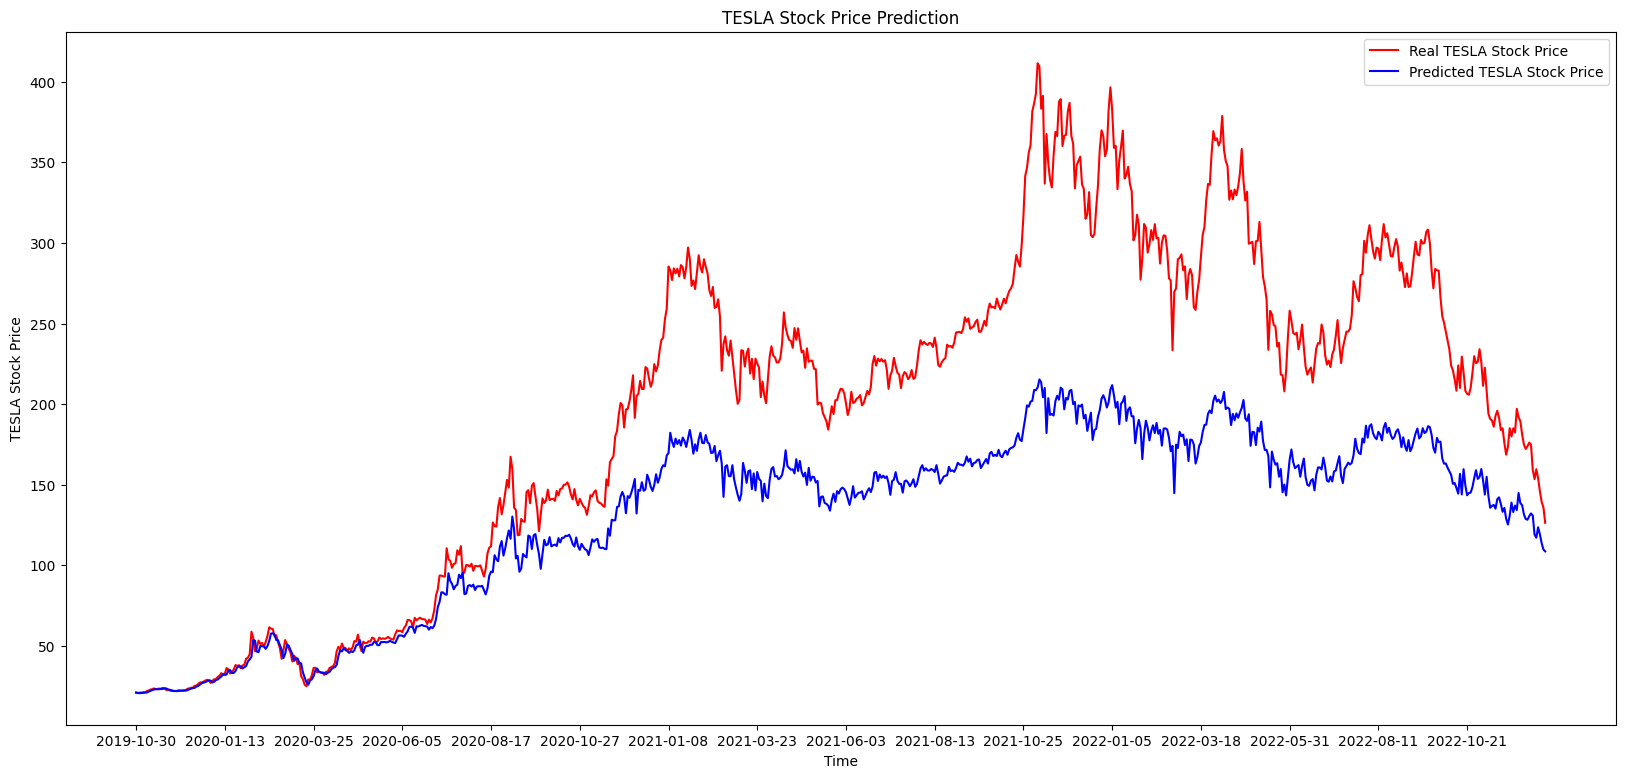

In [31]:
# Visualising the results
plt.figure(figsize=(20,9))
plt.plot(df.loc[1200:, 'Date'],dataset_test.values, color ='red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[1200:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,795,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [34]:
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

25/25 [==============================] - 1s 47ms/step


GRU results

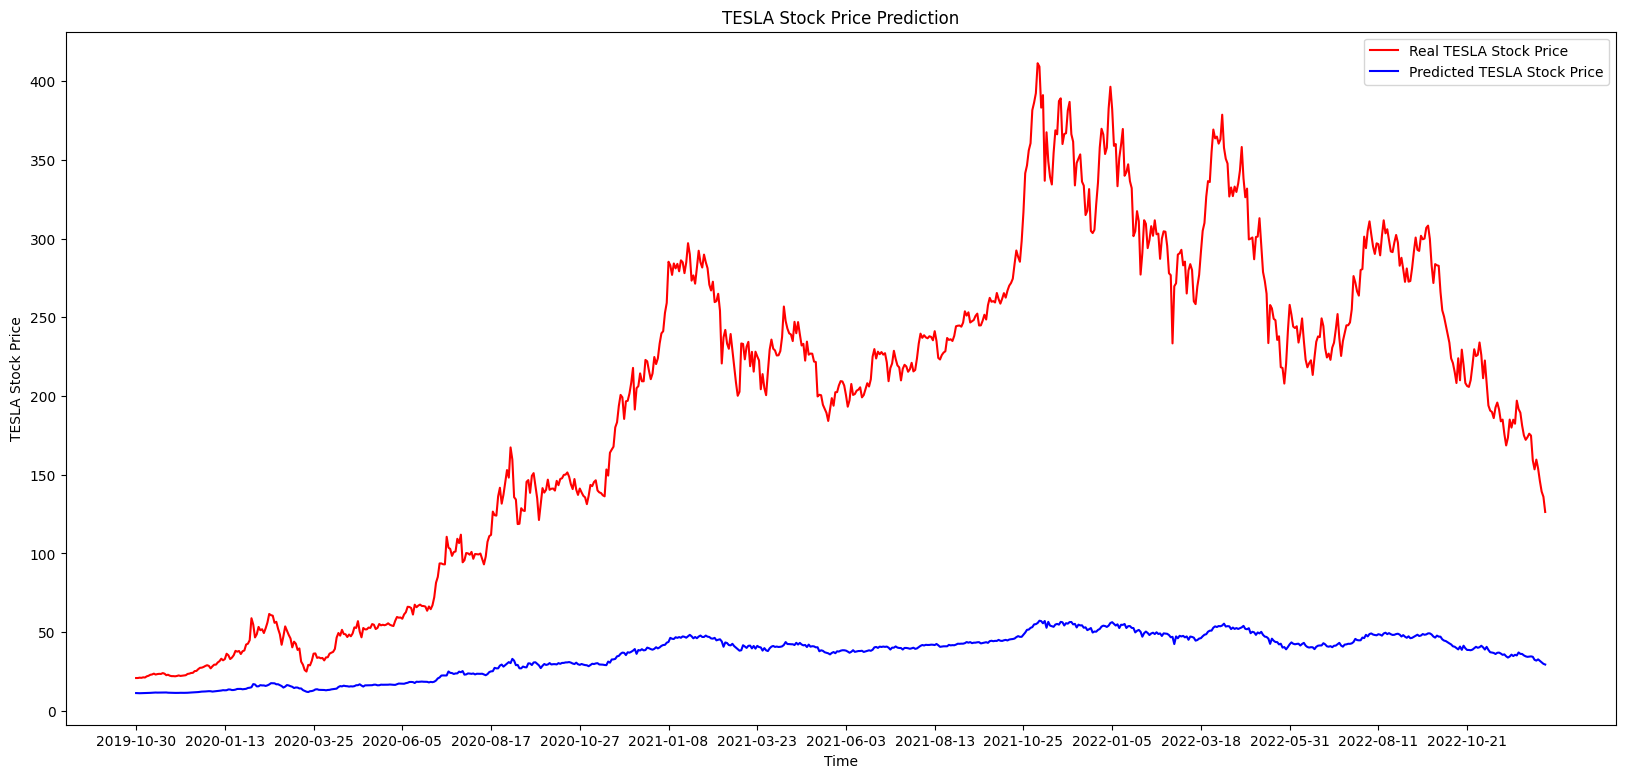

In [35]:
# Visualising the results
plt.figure(figsize=(20,9))
plt.plot(df.loc[1200:, 'Date'],dataset_test.values, color ='red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[1200:, 'Date'],predicted_stock_price2, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,795,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()